In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# Load csv
df = pd.read_csv('/home/pyarena/code for DL/monkeyPox/archive(2)/Monkey_Pox_Cases_Worldwide.csv')

In [3]:
# Checking shape of data
print('Shape of the data:', df.shape)

Shape of the data: (41, 6)


In [4]:
# Checking top 5 rows
pd.set_option('display.max_columns', df.shape[1])
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,183.0,0.0,5.0,2.0,7.0
1,Portugal,100.0,0.0,0.0,0.0,34.0
2,Spain,137.0,66.0,10.0,2.0,0.0
3,United States,15.0,0.0,2.0,9.0,0.0
4,Canada,27.0,36.0,1.0,0.0,0.0


In [5]:
# Checking non-null count and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             41 non-null     object 
 1   Confirmed_Cases     41 non-null     float64
 2   Suspected_Cases     41 non-null     float64
 3   Hospitalized        41 non-null     float64
 4   Travel_History_Yes  41 non-null     float64
 5   Travel_History_No   41 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.0+ KB


In [6]:
# Checking Unique Values in every column
pd.set_option('display.max_rows', 500)
unique_values_1 = []
unique_values_2 = []
unique_values_3 = []
for k in df.columns:
    unique_values_1.append(k)
    unique_values_2.append(df[k].nunique())
    unique_values_3.append(round(df[k].nunique()*100/df.shape[0], 2))
unique_values = pd.concat([pd.DataFrame(unique_values_1, columns = ['Variables']), 
          pd.DataFrame(unique_values_2, columns = ['Unique Values']), 
          pd.DataFrame(unique_values_3, columns = ['Percent_Unique_Values'])], axis = 1)
unique_values

,Variables,Unique Values,Percent_Unique_Values
0,Country,41,100.00
1,Confirmed_Cases,15,36.59
2,Suspected_Cases,8,19.51
3,Hospitalized,7,17.07
4,Travel_History_Yes,7,17.07
5,Travel_History_No,4,9.76


In [7]:
# Dividing dataset into categorical(nominal) and continuous data
df_categorical = df.select_dtypes(['object'])
df_continuous = df.select_dtypes(['float64', 'int64'])

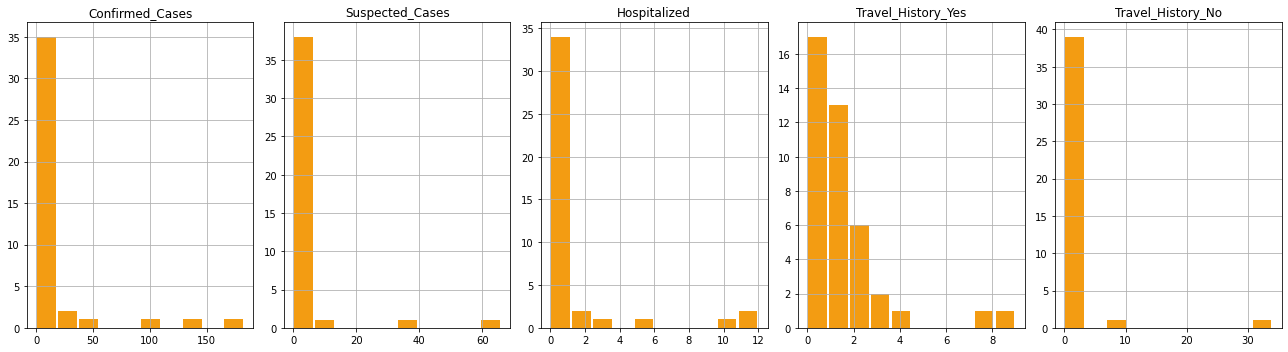

In [8]:
# Plotting histogram of continuous variable to understand the frequency distribution
df_continuous.hist(figsize = (18, 5), layout = (1, 5), sharex = False, sharey = False, rwidth = 0.9, color = '#f39c12')
plt.tight_layout()
plt.show()

In [9]:
# Plotiing correlation matrix
corr = df_continuous.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap = sns.diverging_palette(10, 133, as_cmap = True), axis = None, vmin = -1, vmax = 1)
 .highlight_null(null_color = '#f1f1f1')  # Color NaNs grey
 .format(precision = 2))

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
Confirmed_Cases,nan,nan,nan,nan,nan
Suspected_Cases,0.49,nan,nan,nan,nan
Hospitalized,0.48,0.45,nan,nan,nan
Travel_History_Yes,0.16,0.05,0.60,nan,nan
Travel_History_No,0.50,-0.05,-0.02,-0.08,nan


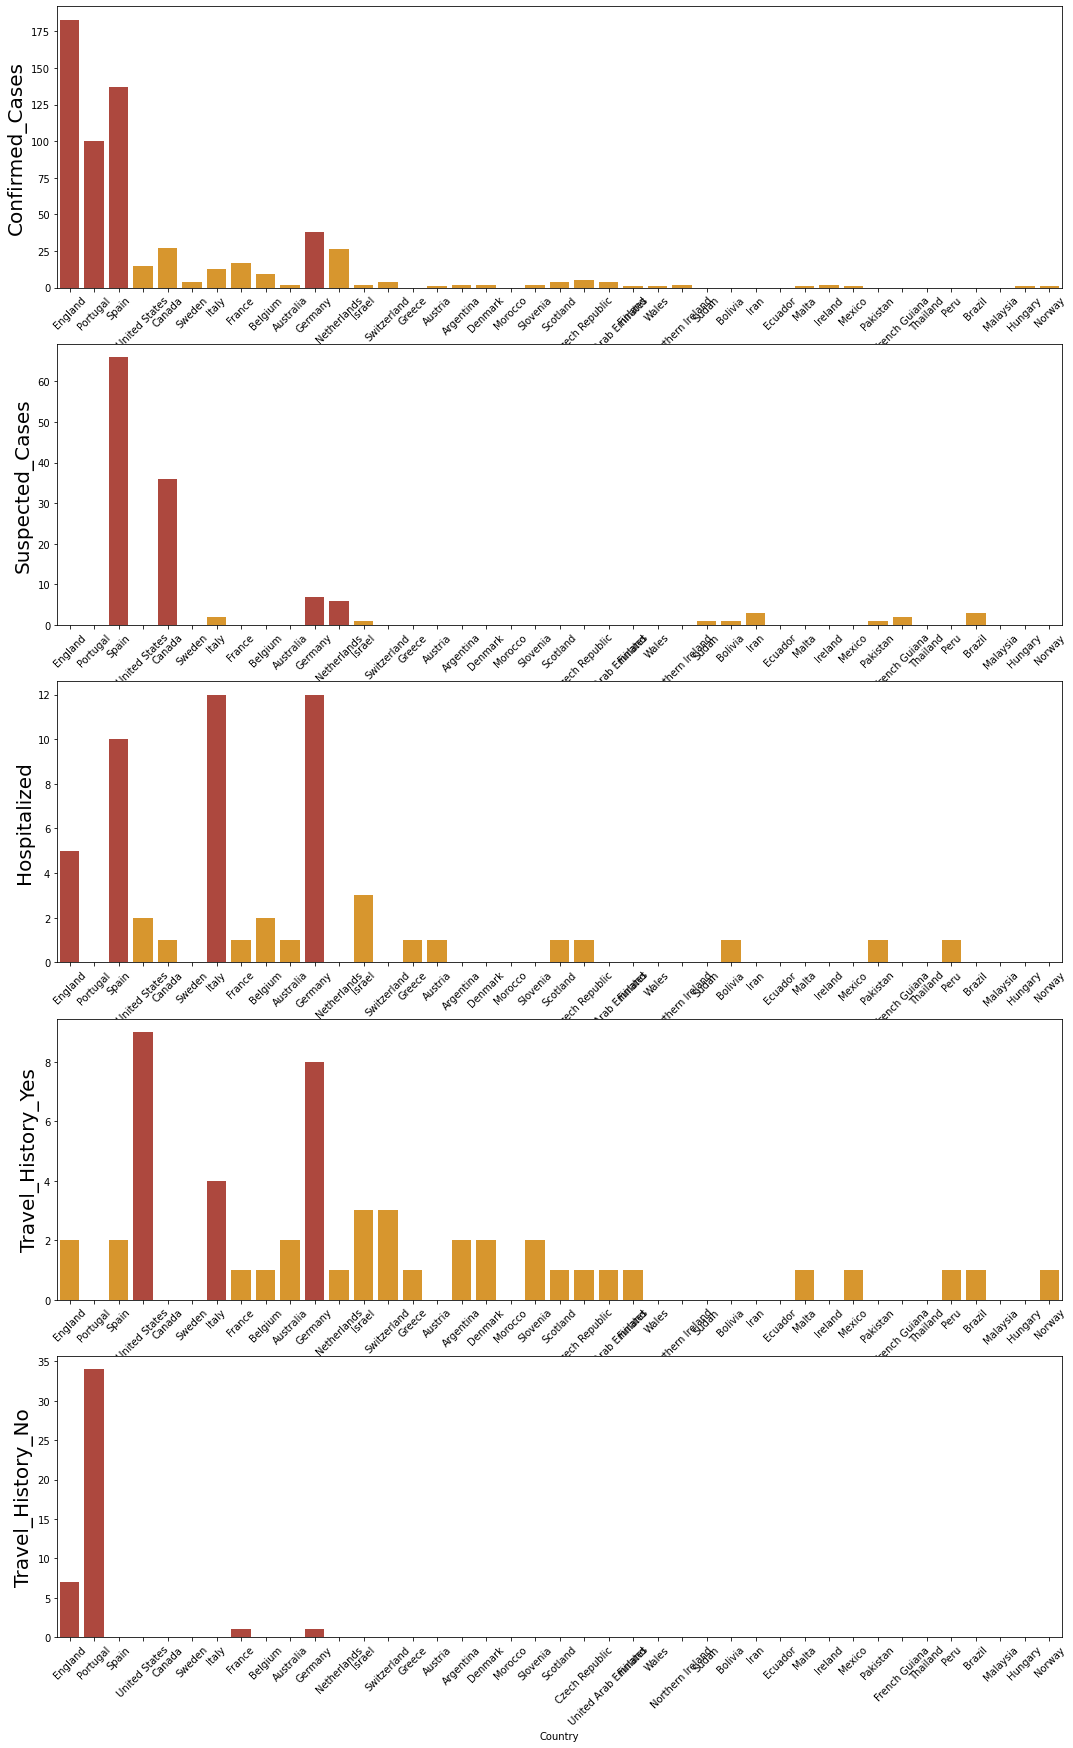

In [10]:
# Analyzing Country variable against continuous variable
# Highlighting top 4 countries in Red
count = 0
plt.subplots(df.shape[1] - 1, 1, figsize = (18, 30), sharex = False, sharey = False)
for j in range(1, df.shape[1]):
    plt.subplot(df.shape[1] - 1, 1, count + 1)
    b = sns.barplot(x = df.iloc[:,0], y = df.iloc[:, j], orient = 'vertical', 
                    palette = ['#c0392b' if (x > df.iloc[:, j].nlargest(5).reset_index(drop = True)[4]) else '#f39c12' for x in df.iloc[:, j]])
    b.set_xlabel(df.columns[0], fontsize = 10)
    b.set_ylabel(df.columns[j], fontsize = 20, rotation = 90)
    b.set_xticklabels(b.get_xticklabels(), rotation = 45)
    count += 1
plt.show()